#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
import re
import matplotlib.pyplot as plt
# Import word_tokenize and stopwords from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
import string
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [2]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [3]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("/content/drive/My Drive/nela10sample.csv")
data.content=data.content.astype(str)
data.title=data.title.astype(str)

In [ ]:
data

,id,date,source,title,content,author,url,published,published_utc,collection_utc,Reliability
0,abcnews--2020-04-15--Students could take SAT a...,2020-04-15,abcnews,Students could take SAT at home if schools rem...,A home version of the SAT college entrance exa...,NaN,https://abcnews.go.com/US/wireStory/students-s...,"Wed, 15 Apr 2020 19:33:47 -0400",1586993627,1586993864,0
1,abcnews--2020-04-15--Detroit facing fresh fisc...,2020-04-15,abcnews,Detroit facing fresh fiscal woes with coronavi...,DETROIT -- Barely surviving the 2008 economic ...,NaN,https://abcnews.go.com/US/wireStory/detroit-fa...,"Wed, 15 Apr 2020 19:30:18 -0400",1586993418,1586993865,0
2,abcnews--2020-04-15--Thousands protest Michiga...,2020-04-15,abcnews,Thousands protest Michigan governor's social d...,"LANSING, Mich. -- Thousands of flag-waving, ho...",NaN,https://abcnews.go.com/US/wireStory/hundreds-p...,"Wed, 15 Apr 2020 18:48:35 -0400",1586990915,1586993866,0
3,abcnews--2020-04-15--Baltimore Police defends ...,2020-04-15,abcnews,Baltimore Police defends planned aerial survei...,The Baltimore Police Department on Wednesday d...,NaN,https://abcnews.go.com/US/wireStory/baltimore-...,"Wed, 15 Apr 2020 18:32:47 -0400",1586989967,1586993867,0
4,abcnews--2020-04-15--Attorney who fought for c...,2020-04-15,abcnews,Attorney who fought for civil rights in Louisi...,NEW ORLEANS -- A white lawyer who defended bla...,NaN,https://abcnews.go.com/US/wireStory/attorney-f...,"Wed, 15 Apr 2020 18:12:18 -0400",1586988738,1586993864,0
...,...,...,...,...,...,...,...,...,...,...,...
102549,wearechange--2020-04-26--North Korea Power Vac...,2020-04-26,wearechange,North Korea Power Vacuum Brings US And China T...,The fall of North Korea could lead to a US war...,AJ Nelson,https://wearechange.org/north-korea-power-vacu...,"Sun, 26 Apr 2020 20:12:36 +0000",1587946356,1587951770,2
102550,wearechange--2020-04-26--Twitter Suspends Acco...,2020-04-26,wearechange,Twitter Suspends Account of Biotech Company Te...,Twitter has suspended the account of a Colorad...,AJ Nelson,https://wearechange.org/twitter-suspends-accou...,"Sun, 26 Apr 2020 19:14:56 +0000",1587942896,1587951772,2
102551,wearechange--2020-04-26--Riots Have Started In...,2020-04-26,wearechange,Riots Have Started In Venezuela! Will It Come ...,"OH YEAH, since we are not corporate or governm...",AJ Nelson,https://wearechange.org/riots-have-started-in-...,"Sun, 26 Apr 2020 17:48:15 +0000",1587937695,1587951770,2
102552,wearechange--2020-04-27--True Coronavirus Deat...,2020-04-27,wearechange,True Coronavirus Death Toll Likely 60% Higher ...,As experts try to model the true number of cor...,AJ Nelson,https://wearechange.org/true-coronavirus-death...,"Mon, 27 Apr 2020 02:10:52 +0000",1587967852,1587991692,2


In [5]:
# Shape of each set

print("Shape of DATA: ", data.shape)

Shape of DATA:  (102554, 11)


In [6]:
# Concetanate title and content
data["content"] = data["title"] + " " + data["content"]

#Keep only content, Reliability as columns
data = data.drop(['id','date','source','title','author','url','published','published_utc','collection_utc'],axis=1)

In [7]:
data

,content,Reliability
0,Students could take SAT at home if schools rem...,0
1,Detroit facing fresh fiscal woes with coronavi...,0
2,Thousands protest Michigan governor's social d...,0
3,Baltimore Police defends planned aerial survei...,0
4,Attorney who fought for civil rights in Louisi...,0
...,...,...
102549,North Korea Power Vacuum Brings US And China T...,2
102550,Twitter Suspends Account of Biotech Company Te...,2
102551,Riots Have Started In Venezuela! Will It Come ...,2
102552,True Coronavirus Death Toll Likely 60% Higher ...,2


# Sentiment Analysis

Get polarity and subjectivity scores of the news with TextBlob

In [7]:
# Import the TextBlob
from textblob import TextBlob

In [8]:
df1 = data[:1000]
df2 = data[-1000:]
df3 = [df1,df2]
smallerdf = pd.concat(df3)

In [14]:
# Add polarities and subkectivities into the DataFrame by using TextBlob
smallerdf["Polarity"] = smallerdf["content"].apply(lambda word: TextBlob(word).sentiment.polarity)
smallerdf["Subjectivity"] = smallerdf["content"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

# Display the Polarity and Subjectivity columns of train dataset
display(smallerdf[["content","Polarity","Subjectivity"]].head(10))

,content,Polarity,Subjectivity
0,Students could take SAT at home if schools rem...,0.079265,0.395490
1,Detroit facing fresh fiscal woes with coronavi...,0.072199,0.433984
2,Thousands protest Michigan governor's social d...,-0.072874,0.411442
3,Baltimore Police defends planned aerial survei...,0.033147,0.602930
4,Attorney who fought for civil rights in Louisi...,0.185473,0.484764
5,California to give cash payments to immigrants...,0.096134,0.421376
6,Deputies: Florida doctors who took down Trump ...,-0.031313,0.246465
7,Evidence of virus' effect on US economy grows ...,0.110147,0.393699
8,Lawyer for Hanukkah stabbing suspect seeks to ...,-0.114876,0.404959
9,Explosion caught on video damages paper mill; ...,-0.034538,0.497237


In [15]:
# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
smallerdf["SentLabel"] = smallerdf["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(smallerdf[["SentLabel"]].head(10))

,SentLabel
0,Positive
1,Positive
2,Negative
3,Positive
4,Positive
5,Positive
6,Negative
7,Positive
8,Negative
9,Negative


In [15]:
# Print the value counts of the SentLabel column
print(smallerdf["SentLabel"].value_counts())

Positive    1379
Negative     584
Neutral       37
Name: SentLabel, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


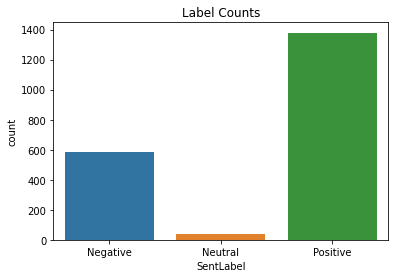

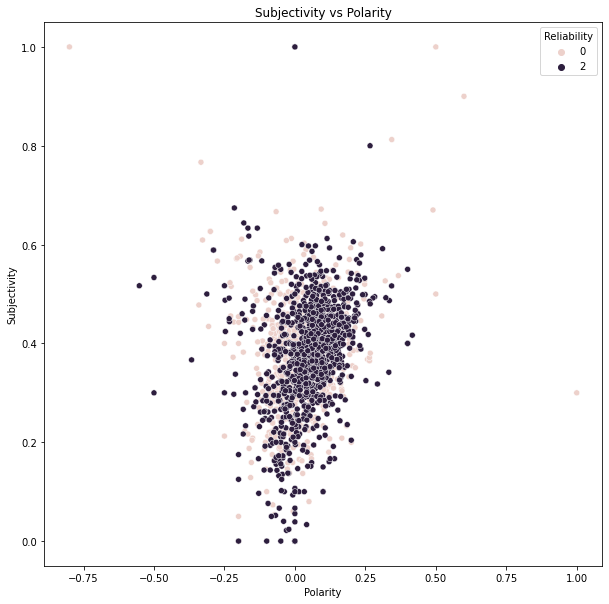

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Change the datatype as "category"
smallerdf["SentLabel"] = smallerdf["SentLabel"].astype("category")

# Visualize the Label counts
sns.countplot(smallerdf["SentLabel"])
plt.title("Label Counts")
plt.show()

# Visualize the Polarity scores
plt.figure(figsize = (10, 10)) 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Reliability", data=smallerdf)
plt.title("Subjectivity vs Polarity")
plt.show()

In [10]:
def rem_noise(text):
  text = text.translate(str.maketrans('','',string.punctuation))

  text =  re.sub('[0-9]+','',text)

  text = re.sub('https?:\S+','',text)

  text =  re.sub('<.*?>'," ",text)

  return text

In [11]:
stop = set(stopwords.words('english'))

def rem_stopwords(text):
    
    words = [ch for ch in text if ch not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in text.split()]
    
    return words

In [12]:
def tokenize_statements(text):
    
    # Tokenize the words
    tokenized = word_tokenize(text)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words, changing text to lowercase
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token.lower(), pos='a') for token in tokenized]
    
    return tokenized

In [16]:
#Keep only content, Polarity and Subjectivity as columns
x = smallerdf.drop(['Reliability','SentLabel'],axis=1)
x['content'] = x['content'].apply(rem_noise)
y = smallerdf['Reliability']

In [175]:
smallerdf

,content,Reliability,Polarity,Subjectivity,SentLabel
0,Students could take SAT at home if schools rem...,0,0.079265,0.395490,Positive
1,Detroit facing fresh fiscal woes with coronavi...,0,0.072199,0.433984,Positive
2,Thousands protest Michigan governor's social d...,0,-0.072874,0.411442,Negative
3,Baltimore Police defends planned aerial survei...,0,0.033147,0.602930,Positive
4,Attorney who fought for civil rights in Louisi...,0,0.185473,0.484764,Positive
...,...,...,...,...,...
102549,North Korea Power Vacuum Brings US And China T...,2,0.292932,0.317857,Positive
102550,Twitter Suspends Account of Biotech Company Te...,2,0.094251,0.485027,Positive
102551,Riots Have Started In Venezuela! Will It Come ...,2,0.000000,0.000000,Neutral
102552,True Coronavirus Death Toll Likely 60% Higher ...,2,0.065671,0.461993,Positive


In [125]:
# split the dataset into training and testing datasets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 3)
(1600,)
(400, 3)
(400,)


In [57]:
X_train

,content,Polarity,Subjectivity
102389,Judge US not unreasonably delaying virus relie...,0.136264,0.440888
321,Lockdown ends at air base resulted from misund...,-0.158974,0.553846
101893,Think tank urges more deliberate approach to c...,0.089909,0.383584
701,Things to Know for Today Your daily look at l...,0.159055,0.407828
896,Pregnant UK nurse dies from virus but baby wel...,0.108867,0.480838
...,...,...,...
145,US plutonium production plan likely to spur le...,0.079720,0.429547
221,Recovery begins after storms that kill in Mid...,0.018548,0.347473
101901,Latest survey of California snow pack measures...,0.073952,0.416929
921,World Health Organization What is the WHO and ...,0.066443,0.366277


In [126]:
# Vectorize the text so the models can actually interpret it
vectorizer = TfidfVectorizer(tokenize_statements)
x_train_vectorized = vectorizer.fit_transform(X_train.content.values)
x_test_vectorized = vectorizer.transform(X_test.content.values)

In [60]:
x_train_vectorized

<1600x28852 sparse matrix of type '<class 'numpy.float64'>'
	with 334530 stored elements in Compressed Sparse Row format>

In [61]:
print (x_train_vectorized.shape)
print (x_test_vectorized.shape)
print (y_train.shape)
print (y_test.shape)



(1600, 28852)
(400, 28852)
(1600,)
(400,)


In [62]:
type (X_train["Polarity"].values)

numpy.ndarray

In [63]:
print (x_train_vectorized)

  (0, 17921)	0.015756144826033405
  (0, 3777)	0.0336846574813397
  (0, 395)	0.03473514075422518
  (0, 21288)	0.04201384484268249
  (0, 21164)	0.03473514075422518
  (0, 14494)	0.0307072976579354
  (0, 722)	0.014170303798357962
  (0, 5055)	0.04755287824014807
  (0, 21595)	0.04755287824014807
  (0, 8628)	0.04755287824014807
  (0, 27186)	0.044251030949231294
  (0, 2588)	0.051141506278338716
  (0, 1465)	0.00998194360106924
  (0, 23162)	0.051141506278338716
  (0, 21294)	0.025525552410419237
  (0, 2470)	0.05398996059967387
  (0, 25356)	0.024043983317239878
  (0, 21138)	0.032601725408246074
  (0, 18033)	0.012513469121292135
  (0, 6368)	0.02911418044860988
  (0, 26677)	0.01319742858847344
  (0, 17166)	0.020779339040478885
  (0, 28461)	0.026507401404958403
  (0, 21541)	0.03983495909359163
  (0, 11688)	0.03448124697518721
  :	:
  (1599, 12354)	0.018167081190932063
  (1599, 25758)	0.014974002221207993
  (1599, 22349)	0.10733218811904344
  (1599, 18015)	0.03880884037558327
  (1599, 70)	0.0140862819

In [127]:
x_train_pol = X_train["Polarity"]
x_test_pol = X_test["Polarity"]

x_train_pol.shape

(1600,)

In [128]:
df_x_test_tfidf =  pd.DataFrame.sparse.from_spmatrix(x_test_vectorized)
df_x_test_tfidf['polarity'] = X_test['Polarity'].values

df_x_train_tfidf =  pd.DataFrame.sparse.from_spmatrix(x_train_vectorized)
df_x_train_tfidf['polarity'] = X_train['Polarity'].values

In [69]:
df_x_test_tfidf['polarity']

0      0.084439
1      0.202771
2      0.053333
3      0.025000
4      0.216931
         ...   
395    0.132323
396    0.061492
397    0.008541
398   -0.021607
399    0.043617
Name: polarity, Length: 400, dtype: float64

In [129]:
df_x_train_tfidf_nopol = df_x_train_tfidf.drop(['polarity'],axis=1)
df_x_test_tfidf_nopol = df_x_test_tfidf.drop(['polarity'],axis=1)

In [ ]:
df_x_test_tfidf_nopol

# Logistic Regression

In [84]:
log_reg = LogisticRegression()
log_reg.fit(df_x_train_tfidf, y_train)
logR_predicted = log_reg.predict(df_x_test_tfidf)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(df_x_test_tfidf, y_test)}")

LogisticRegression accuracy: 0.8375


In [100]:
log_reg_nopol = LogisticRegression()
log_reg_nopol.fit(df_x_train_tfidf_nopol, y_train)
logR_predicted = log_reg_nopol.predict(df_x_test_tfidf_nopol)
print(f"{log_reg_nopol.__class__.__name__} accuracy: {log_reg_nopol.score(df_x_test_tfidf_nopol, y_test)}")

LogisticRegression accuracy: 0.835


In [76]:
print(classification_report(y_test, logR_predicted))
print('\n')
print(confusion_matrix(y_test, logR_predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       210
           2       0.85      0.79      0.82       190

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



[[184  26]
 [ 40 150]]


In [85]:
cv_results = cross_validate(log_reg, df_x_train_tfidf, y_train, cv=2)
cv_results['test_score'].mean()

0.789375

#Random Forest

In [89]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(df_x_train_tfidf, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(df_x_test_tfidf, y_test)}")

RandomForestClassifier accuracy: 0.78


In [133]:
random_forest_nopol = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest_nopol.fit(df_x_train_tfidf_nopol, y_train)

print(f"{random_forest_nopol.__class__.__name__} accuracy: {random_forest_nopol.score(df_x_test_tfidf_nopol, y_test)}")

RandomForestClassifier accuracy: 0.8225


In [104]:
rForest_pred = random_forest.predict(df_x_test_tfidf)
print(classification_report(y_test, rForest_pred))
print('\n')
print(confusion_matrix(y_test, rForest_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       210
           2       0.82      0.69      0.75       190

    accuracy                           0.78       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



[[181  29]
 [ 59 131]]


In [ ]:
cv_results = cross_validate(random_forest, df_x_train_tfidf, y_train, cv=5)
cv_results['test_score'].mean()

#SVM

In [145]:
svm = LinearSVC()
svm.fit(df_x_train_tfidf, y_train)
print(f"{svm.__class__.__name__} accuracy: {svm.score(df_x_test_tfidf, y_test)}")

LinearSVC accuracy: 0.865


In [146]:
svm_nopol = LinearSVC()
svm_nopol.fit(df_x_train_tfidf_nopol, y_train)
print(f"{svm_nopol.__class__.__name__} accuracy: {svm_nopol.score(df_x_test_tfidf_nopol, y_test)}")

LinearSVC accuracy: 0.865


In [149]:
svm_pred = svm.predict(df_x_test_tfidf)

print(classification_report(y_test, svm_pred))
print('\n')
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       200
           2       0.88      0.84      0.86       200

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



[[178  22]
 [ 32 168]]


In [ ]:
cv_results = cross_validate(svm, df_x_train_tfidf, y_train, cv=5)
cv_results['test_score'].mean()

#Glove LSTM

In [17]:
glovedf = smallerdf.reset_index(drop=True)
contentglove = glovedf.drop(['Polarity',	'Subjectivity', 'Reliability','SentLabel'],axis=1)

In [42]:
contentglove

,content
0,Students could take SAT at home if schools rem...
1,Detroit facing fresh fiscal woes with coronavi...
2,Thousands protest Michigan governor's social d...
3,Baltimore Police defends planned aerial survei...
4,Attorney who fought for civil rights in Louisi...
...,...
1995,North Korea Power Vacuum Brings US And China T...
1996,Twitter Suspends Account of Biotech Company Te...
1997,Riots Have Started In Venezuela! Will It Come ...
1998,True Coronavirus Death Toll Likely 60% Higher ...


In [19]:
cleantext = contentglove['content'].apply(rem_noise)
cleantext = cleantext.apply(rem_stopwords)

In [20]:
x = cleantext.values
y = smallerdf['Reliability']

In [21]:
from keras.preprocessing import text, sequence

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
contentSequence = tokenizer.texts_to_sequences(x)

In [25]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 100

In [27]:
from keras.preprocessing.sequence import pad_sequences

contentSequence = pad_sequences(contentSequence, maxlen=max_length)

In [28]:
contentSequence

array([[ 6267,     7,  2872, ...,   726,    70,   617],
       [    1,  1425,  3418, ...,   889,     2, 22553],
       [13632,     2,   550, ...,     2,    35,   136],
       ...,
       [    0,     0,     0, ...,   259,    39,    10],
       [  563,   326,     9, ...,    95,    12,   939],
       [ 7181,   240,    65, ...,    40, 38488,   282]], dtype=int32)

#Glove Embedding

In [29]:
# load the whole embedding into memory

embeddings_index = {};
with open('/content/drive/My Drive/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

# create a weight matrix for words

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [30]:
embeddings_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [-0.47986999, -0.26526999,  0.59833997, ..., -0.81400001,
         0.065616  ,  0.38069001],
       [-0.38696   , -0.32319   ,  0.1393    , ..., -0.73497999,
        -0.31455001, -0.44358   ],
       [-0.10358   ,  0.75185001,  0.095333  , ..., -0.96350998,
        -0.37919   ,  1.15339994]])

In [31]:
# Change labels
def change_labels(y):
    if y == 0:
        return 0
    if y == 2:
        return 1

y["Label"] = glovedf.Reliability.apply(change_labels)

print(y["Label"])

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Reliability, Length: 2000, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
type (contentSequence)

numpy.ndarray

In [65]:
df_lstm =  pd.DataFrame(contentSequence)
#df_lstm['polarity'] = smallerdf['Polarity'].values

In [58]:
df_lstm.shape

(2000, 251)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_lstm,y["Label"],test_size=0.20,random_state=1)

In [46]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,6267,7,2872,160,2500,881,1,5108,4,1570,288,9,38,85,13621,2871,22538,1,775,4,87,286,160,16645,1256,2,2030,782,6,782,467,72,7,1,158,494,1919,12,1,824,...,335,2,1505,2599,10228,1010,7665,15,84,9,286,160,276,541,521,33,515,332,135,1,111,288,4514,1,782,467,20,1407,2,152,276,3,521,2073,2874,3,1887,726,70,617
816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,166,676,5,3208,6,27960,11231,6593,1366,3,2135,213,2454,3,3537,2542,6,6098,88,35,632,20,32,3364,2,3568,1,10381,4,1,4964,453,6,48,3340,19,12,11231,27,27961
790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,263,1028,19625,2312,2719,927,230,2,804,263,1028,7,137,19,...,1817,19,1130,1,819,1262,6,997,6,165,1146,4,14507,987,6,2787,2,2312,2719,3010,7,137,8,5588,3,1199,6648,6,2312,2719,28,145,76,4,27726,873,1,198,570,5160
361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,457,1092,114,1,1118,7,43,11,218,46,1224,114,161,616,218,1,528,14,11,45,297,2,24889,6,985,9,915,1,457,1158,4,226,7,19,11,665,66,1,9723,168
592,82,33,1300,13,35,2881,3,13,62,4,39,48,143,70,208,85,196,322,726,5,3339,7769,2516,3,819,10580,43,7,1,1125,20,451,7834,4,813,85,125,19,323,116,...,636,16,240,16,4615,3,7666,19002,3,3246,10580,932,3030,4611,7,543,329,143,303,23,5,358,2,745,99,8,2516,636,9,62,12,67,946,5,1439,9,12443,29,5,26385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,6,5,7255,6471,525,5,338,210,72,7,1,36716,4434,33,293,687,10,1,649,491,143,3118,85,40,687,33,23,6,11647,560,170,2064,24,1,573,4663,3,1,573,884,...,796,1,472,1839,4,1,549,4,1,1283,347,3,1,21778,8619,3604,1549,3604,3,9692,24,16,3603,3,36719,835,16,19,11,92,7922,1514,7283,1065,1,39,1539,2,199,789
1096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,345,188,5,12803,1,510,12,625,25,1716,898,2,566,61,118,19,438,6,20798,1609,14,7,12388,3,1,54,55,392,241,6,35,128,28,743,979,35,170,512,53,600
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9195,4002,3,1876,7733,39,8,6952,264,237,45,1527,6952,227,3,422,237,118,986,12,19,428,22451,41,15746,4002,3,1876,140,66,58,4,1,20877,3,5823,6183,38,1,9585
235,1,13839,10475,1147,4,4289,5,44,174,49,97,475,7,1,1693,541,453,11,27,206,921,5,5519,3,11,241,21,1,1470,14,7,1,1693,807,48,218,495,1,1470,1,...,24093,1,2281,5171,15,1,12167,24094,52,12,251,1,718,17,1,168,598,73,1,664,134,14,724,1,1470,1054,17641,15,1,2024,14035,1023,24095,572,106,877,1,324,233,188


In [47]:
X_train.shape

(1600, 250)

In [48]:
y_train.shape

(1600,)

# Defining Neural Network

In [60]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
#LSTM 
model.add(LSTM(units=128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          3848900   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,966,277
Trainable params: 117,377
Non-trainable params: 3,848,900
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=5)

In [ ]:
y_pred_glove = (model.predict(X_test) > 0.5).astype("int")

In [ ]:
print(classification_report(y_test, y_pred_glove, zero_division = 1))

In [ ]:
#plot accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model_noGlove = Sequential()
#Non-trainable embeddidng layer
model_noGlove.add(Embedding(vocab_size+1,50,input_length=max_length))
#LSTM 
model_noGlove.add(LSTM(units=128))
model_noGlove.add(Dense(1, activation='sigmoid'))
model_noGlove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_noGlove = model_noGlove.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=5) 